In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("cleaned_CB.xlsx")
df

,age,avg_order_value,total_orders,is_fraudulent,loyalty_score,churn_risk,customer_since_month,last_purchase_month,gender_Male,gender_Other,...,country_France,country_Germany,country_India,country_Japan,country_UK,country_USA,preferred_category_Electronics,preferred_category_Fashion,preferred_category_Home,preferred_category_Sports
0,-1.015895,0.150485,8,1,-0.001367,-0.529103,-0.997086,-0.150141,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.270530,-0.029012,10,0,-0.452297,0.347683,-0.770553,-1.009074,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1.389160,-0.158530,6,0,0.518938,-1.468516,-0.883820,0.136169,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.015895,0.286960,9,1,1.490173,-0.591730,1.721313,1.567724,0,1,...,0,0,0,1,0,0,1,0,0,0
4,-1.071827,1.871204,16,0,1.004556,-0.842241,-1.563419,1.567724,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.046803,0.594432,9,0,-1.284785,0.285056,1.551413,1.281413,0,0,...,0,0,0,0,1,0,1,0,0,0
4996,-1.407416,-0.992253,10,0,0.553625,-0.403848,-1.223619,0.995102,0,0,...,0,0,0,0,1,0,0,0,1,0
4997,1.724749,1.534210,16,0,0.206755,-0.341220,0.078947,-1.009074,1,0,...,0,0,0,1,0,0,0,0,0,0
4998,0.773913,1.495854,8,0,-0.105428,-1.218006,-0.260853,0.708791,1,0,...,0,0,0,0,0,1,0,1,0,0


In [3]:
X = df.drop(columns = ['is_fraudulent'])
y = df['is_fraudulent']

- Create X & y

**Train & test split**

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 81)

In [5]:
y_train.value_counts() #checking balance or imbalance data

is_fraudulent
0    3900
1     100
Name: count, dtype: int64

In [6]:
from sklearn.decomposition import PCA
pc = PCA(n_components = 0.95)
X_train = pc.fit_transform(X_train)
X_test = pc.transform(X_test)

In [7]:
pc.explained_variance_ratio_

array([0.56533331, 0.05823034, 0.05719574, 0.05612916, 0.05557893,
       0.0549114 , 0.0527382 , 0.01459246, 0.01135269, 0.01117099,
       0.01089615, 0.00579507])

**Modelling**

In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

**Prediction**

In [9]:
ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

**Evaluation**

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print('train_accuracy:',accuracy_score(ypred_train,y_train))
print('test_accuracy:',accuracy_score(ypred_test,y_test))
print('cv_score:',cross_val_score(log_model,X_train,y_train,cv=5,scoring = 'accuracy').mean())

train_accuracy: 0.975
test_accuracy: 0.971
cv_score: 0.975


**Confusion Matrix**

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

[[971   0]
 [ 29   0]]


**Classification Report**

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       971
           1       0.00      0.00      0.00        29

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.94      0.97      0.96      1000



**AUC**

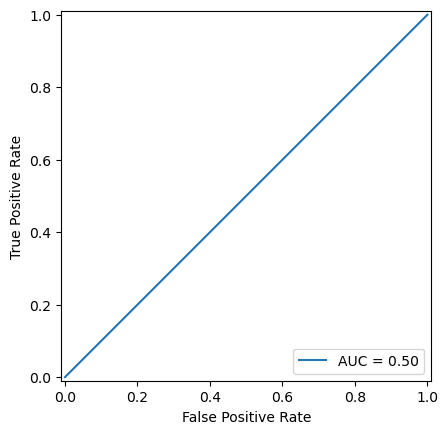

In [13]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [14]:
#AUC Score
from sklearn.metrics import roc_auc_score
print('AUC_Score',roc_auc_score(y_test,ypred_test))

AUC_Score 0.5
